In [1]:
import pandas

# Load individual tables
users = pandas.read_csv('/Users/yashds/Downloads/movielens/users.csv')
ratings = pandas.read_csv('/Users/yashds/Downloads/movielens/ratings.csv')
movies = pandas.read_csv('/Users/yashds/Downloads/movielens/movies.csv')

# Merge tables
mr = pandas.merge(users, ratings)
data = pandas.merge(movies, mr)


### What are the top-10 best rated genres?


Steps to carry out:

+ group the dataset by the genres of movies.
+ calculate the mean rating for each genre.
+ sort the genres in descending order of the mean rating, so that the highest rated genres appear at the top

In [2]:
df = data.groupby(['genres'])['rating'].mean().sort_values(ascending=False)[0:10]
df

genres
Animation|Comedy|Thriller            4.473837
Sci-Fi|War                           4.449890
Animation                            4.394336
Film-Noir|Mystery                    4.367424
Adventure|War                        4.346107
Film-Noir|Romance|Thriller           4.294382
Action|Adventure|Drama|Sci-Fi|War    4.292977
Film-Noir|Sci-Fi                     4.273333
Crime|Film-Noir                      4.264129
Film-Noir                            4.258105
Name: rating, dtype: float64

Report: This output shows the top 10 genres, with "Animation|Comedy|Thriller" being the highest rated genre and "Film-Noir"  being the lowest rated among the top 10. 
The mean rating for each genre is shown next to the genre name.



### Here we are only interested in popular genres, each of which has at least 5000 ratings. What are the top-5 best rated genres among these popular genres?

Steps to carry out:
+ We can then count the number of ratings and filter for genres with at least 5000 ratings
+ Then we calculate the average rating for each of these popular genres and sort them in descending order to get the top-5 best rated genres.

In [5]:
genres_counts = data.groupby('genres')['rating'].count()
popular_genres = genres_counts[genres_counts >= 5000].index
popular_genres.columns = ['rating', 'num_ratings']
genre_avg_ratings = data[data['genres'].isin(popular_genres)].groupby('genres')['rating'].mean()
top_5_genres = genre_avg_ratings.sort_values(ascending=False)[0:5]
top_5_genres


genres
Action|Crime|Drama    4.110883
Drama|War             4.098936
Action|Drama|War      4.047693
Drama|Romance|War     3.962780
Documentary           3.960734
Name: rating, dtype: float64

Report: The top-5 best rated genres among the popular genres in the MovieLens dataset are:

+ Action|Crime|Drama   
+ Drama|War             
+ Action|Drama|War      
+ Drama|Romance|War     
+ Documentary



### Among the top-5 best rated genres you found in the previous problem, what are the top-20 best rated movies, each of which has at least 100 reviews?

Steps to carry out:

+ Merge dataframe to include only the movies from the top-5 best rated genres found in the previous problem.
+ Group the data by title and calculate the average rating and the number of ratings for each movie.
+ Filter the movies to include only those with at least 100 reviews.
+ Sort the movies by their average rating in descending order.


In [6]:
df = data[data['genres'].isin(top_5_genres.index)]
df5 = df.groupby(['title'])['rating'].agg(['mean', 'count'])
df5.columns = ['avg_rating', 'num_ratings']
popular_movies = df5[df5['num_ratings'] >= 100]
top_20_movies = popular_movies.sort_values(by='avg_rating', ascending=False)[0:20]
top_20_movies

,avg_rating,num_ratings
title,,
"Godfather, The (1972)",4.524966,2223
Schindler's List (1993),4.510417,2304
Paths of Glory (1957),4.473913,230
Casablanca (1942),4.412822,1669
"Bridge on the River Kwai, The (1957)",4.386994,938
"Godfather: Part II, The (1974)",4.357565,1692
"Grand Illusion (Grande illusion, La) (1937)",4.339394,165
Saving Private Ryan (1998),4.337354,2653
When We Were Kings (1996),4.321300,277


Report: 
+ The output is top-20 movies sorted by their average rating, each of which has at least 100 reviews with "Godfather, The (1972)" being on top with average rating of 4.524966 and "Stalag 17 (1953)" being on last spot with average rating of 4.228426.


### Visualize the popularity (rating count) versus quality (average rating) of the top-20 best-rated movies you found in the previous problem.

Steps to carry out:
+ To Visualize the popularity (rating count) versus quality (average rating) of the top-20 best-rated movies found in the previous problem. we can create a seaborn.relplot where the x-axis represents the number of ratings and the y-axis represents the average rating. Each point on the plot will represent a movie, and the size and color of the point can be used to represent the number of ratings.

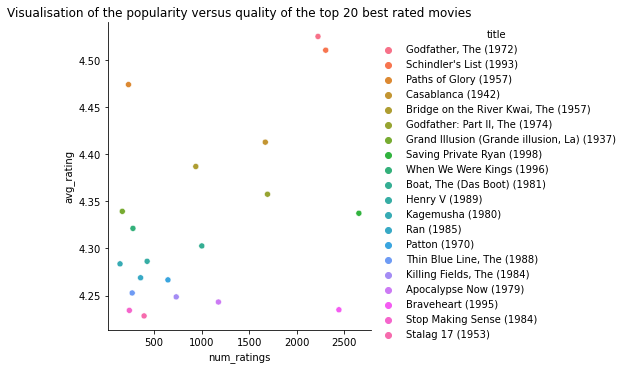

In [6]:
import seaborn
from matplotlib import pyplot


seaborn.relplot(data=top_20_movies, x='num_ratings', y='avg_rating',hue='title')
pyplot.title('Visualisation of the popularity versus quality of the top 20 best rated movies') 
pyplot.show()

Report: 

+ We can see that most of the top-20 movies have a high average rating above 4.0, and a large number of ratings, less than 1000 in most cases. This suggests that movies that are both popular and highly rated tend to appeal to a large and diverse audience.
+ One interesting observation from the plot is that there are a two movies that stand out as being much more popular and highly ratedthan the others, with more than 4.50 average rating and above 2000 reviews. These movies include "Godfather, The (1972)", and "Schindler's List (1993)". Overall, Seaborn relplot provides a useful visualization of the relationship between popularity and quality, and can help us to understand the characteristics of highly rated movies.



### Based on your findings in the previous problem, recommend 4 movies that your friends should see.  Providing a simple justification for your recommendation based on your analysis.

I will recommend these four movies 
+ Kagemusha (1980) 
+ When We Were Kings (1996) 
+ Ran (1985) 
+ Stop Making Sense (1984)

to my friends because these four movies have high average rating with less number ratings when compared to other top 20 movies.

These films has widespread appeal is mainly owing to a variety of factors, including their positive critical response, distinctive and artistic visuals, and capacity to explore important themes and tell compelling stories.


### Among the 4 movies you recommended, on average, which ones are preferred by males and which ones are prefered by females?



Steps to carry out:

+ Filter the ratings data to include only the four movies we recommended 'Kagemusha (1980)' , 'When We Were Kings (1996)', 'Ran (1985)', 'Stop Making Sense (1984)'.
+ Join the filtered ratings data with the user data to obtain the gender of each user.
+ Then we calculate the average rating given by male and female viewers separately for each of the four movies.

In [34]:
df = ['Kagemusha (1980)' , 'When We Were Kings (1996)', 'Ran (1985)', 'Stop Making Sense (1984)']
filtered_ratings = data[ data['title'].isin(df)]
mr = pandas.merge(filtered_ratings, users)
avg_ratings = mr.groupby(['title','gender'])['rating'].mean().sort_values(ascending=False)
avg_ratings

title                      gender
Kagemusha (1980)           F         4.421053
Ran (1985)                 F         4.365079
When We Were Kings (1996)  M         4.346491
Stop Making Sense (1984)   F         4.333333
Kagemusha (1980)           M         4.262295
Ran (1985)                 M         4.248299
When We Were Kings (1996)  F         4.204082
Stop Making Sense (1984)   M         4.203297
Name: rating, dtype: float64

Report:
+ We can see that for three out of the four movies, females have given higher ratings than males. This suggests that these movies may be more appealing to female viewers. 
+ "When We Were Kings (1996)" males have given a higher rating than females. This suggests that this movie may be more appealing to male viewers.
+ Female viewers prefer "Kagemusha (1980)" with their average rating being higher than that of male viewers.
+ Therefore "Kagemusha (1980)", "Ran (1985)", and "Stop Making Sense (1984)" are preferred by females, while "When We Were Kings (1996)" is preferred by males





### Among the 4 movies you recommended, on average, (A) which movie is most liked by the 18 age-group?  (B) which movie is most liked by all age groups?


(A)Steps to carry out:

+ Filter the ratings data to include only the four movies we recommended ('Kagemusha (1980)' , 'When We Were Kings (1996)', 'Ran (1985)', 'Stop Making Sense (1984)').
+ Join the filtered ratings data with the user data to obtain the age of each user.
+ Then we calculate the average rating given by viewers in the 18 age-group.

In [7]:
df = ['Kagemusha (1980)' , 'When We Were Kings (1996)', 'Ran (1985)', 'Stop Making Sense (1984)']
mr = data[ data['title'].isin(df)]
age = mr[mr['age'] == 18]
Most_popular_movie = age.groupby('title')['rating'].mean().sort_values(ascending=False)
Most_popular_movie

title
Ran (1985)                   4.447368
When We Were Kings (1996)    4.406250
Kagemusha (1980)             4.153846
Stop Making Sense (1984)     4.000000
Name: rating, dtype: float64

Report: 
+ "Ran (1985)" is most liked by viewers in the 18 age group, with an average rating of 4.44. This means that this film is appropriate for younger audiences and would be a decent suggestion for someone under the age of 18.

(B)Steps to carry out:
+ Filter the ratings data to include only the four movies we recommended ('Kagemusha (1980)' , 'When We Were Kings (1996)', 'Ran (1985)', 'Stop Making Sense (1984)').
+ Then calculate the average rating for each of the four movies across all age groups.

In [8]:
df = ['Kagemusha (1980)' , 'When We Were Kings (1996)', 'Ran (1985)', 'Stop Making Sense (1984)']
mr = data[ data['title'].isin(df)]
Most_popular_movie = mr.groupby('title')['rating'].mean().sort_values(ascending=False)
Most_popular_movie

title
When We Were Kings (1996)    4.321300
Kagemusha (1980)             4.283688
Ran (1985)                   4.268908
Stop Making Sense (1984)     4.234310
Name: rating, dtype: float64

Report:
+ Among viewers in all age groups, 'When We Were Kings (1996)' is the most liked movie, with the average rating being the highest compared to the other three movies.
